In [15]:
import numpy as np
z = np.random.normal(size=1)
import numpy as np
from scipy.stats import norm
from scipy.stats import binom
import matplotlib.pyplot as plt

In [16]:
# Problem_1
def bsmCallDelta(spot, strike, vol, rate, tau, div):
    d1 = (np.log(spot / strike) + (rate - div + 0.5 * vol * vol) * tau) / (vol * np.sqrt(tau))
    delta = np.exp(-div * tau) * norm.cdf(d1)
    return delta

callDelta = bsmCallDelta(spot, strike, vol, rate, tau, div)
print(f"The Call Delta is: {callDelta : 0.4f}")

The Call Delta is:  0.6911


In [17]:
def bsmPutDelta(spot, strike, vol, rate, tau, div):
    d1 = (np.log(spot / strike) + (rate - div + 0.5 * vol * vol) * tau) / (vol * np.sqrt(tau))
    delta = np.exp(-div * tau) * norm.cdf(-d1)
    return delta

putDelta = bsmPutDelta(spot, strike, vol, rate, tau, div)
print(f"The Put Delta is: {putDelta : 0.4f}")

The Put Delta is:  0.3089


In [28]:
def bsmCallGamma(spot, strike, vol, rate, tau, div):
    d1 = (np.log(spot / strike) + (rate - div + 0.5 * vol * vol) * tau) / (vol * np.sqrt(tau))
    gamma = (np.exp(-div * tau) * norm.pdf(d1))/(spot * vol * np.sqrt(tau))
    return gamma

callgamma = bsmCallGamma(spot, strike, vol, rate, tau, div)
print(f"The Call Gamma is: {callgamma : 0.4f}")

def bsmPutGamma(spot, strike, vol, rate, tau, div):
    d1 = (np.log(spot / strike) + (rate - div + 0.5 * vol * vol) * tau) / (vol * np.sqrt(tau))
    gamma = (np.exp(-div * tau) * norm.pdf(d1))/(spot * vol * np.sqrt(tau))
    return gamma

putgamma = bsmPutGamma(spot, strike, vol, rate, tau, div)
print(f"The Put Gamma is: {putgamma : 0.4f}")

The Call Gamma is:  0.0286
The Put Gamma is:  0.0286


In [31]:
def bsmCallRho(spot, strike, vol, rate, tau, div):
    d1 = (np.log(spot / strike) + (rate - div + 0.5 * vol * vol) * tau) / (vol * np.sqrt(tau))
    d2 = d1 - (vol * np.sqrt(tau))
    Rho =  tau * strike * (np.exp(-rate * tau)) * norm.cdf(d2)
    return Rho

callRho = bsmCallRho(spot, strike, vol, rate, tau, div)
print(f"The Call Rho is: {callRho : 0.4f}")

def bsmPutRho(spot, strike, vol, rate, tau, div):
    d1 = (np.log(spot / strike) + (rate - div + 0.5 * vol * vol) * tau) / (vol * np.sqrt(tau))
    d2 = d1 - (vol * np.sqrt(tau))
    Rho =  -tau * strike * (np.exp(-rate * tau)) * norm.cdf(-d2)
    return Rho

putRho = bsmPutRho(spot, strike, vol, rate, tau, div)
print(f"The put Rho is: {putRho : 0.4f}")

The Call Rho is:  21.3742
The put Rho is: -15.5505


In [33]:
def bsmCallTheta(spot, strike, vol, rate, tau, div):
    d1 = (np.log(spot / strike) + (rate - div + 0.5 * vol * vol) * tau) / (vol * np.sqrt(tau))
    d2 = d1 - (vol * np.sqrt(tau))
    theta = (div * strike ** (-div * tau) * norm.cdf(d1)) - (rate * strike * np.exp(-rate * tau) * norm.cdf(d2))
    - ((strike * np.exp(-rate * tau * norm.pdf(d2) * vol))/2 * np.sqrt(tau))
    return theta

callTheta = bsmCallTheta(spot, strike, vol, rate, tau, div)
print(f"The Call Theta is: {callTheta : 0.4f}")

def bsmPutTheta(spot, strike, vol, rate, tau, div):
    d1 = (np.log(spot / strike) + (rate - div + 0.5 * vol * vol) * tau) / (vol * np.sqrt(tau))
    d2 = d1 - (vol * np.sqrt(tau))
    theta = ((div * strike ** (-div * tau) * norm.cdf(d1)) - (rate * strike * np.exp(-rate * tau) * norm.cdf(d2))
    - ((strike * np.exp(-rate * tau * norm.pdf(d2) * vol))/2 * np.sqrt(tau)))
    + ((rate * strike * np.exp(-rate * tau)) - (div * spot * np.exp(-div * tau)))
    return theta

putTheta = bsmPutTheta(spot, strike, vol, rate, tau, div)
print(f"The Put Theta is: {putTheta : 0.4f}")

The Call Theta is: -1.7099
The Put Theta is: -21.5231


In [37]:
def bsmCallVega(spot, strike, vol, rate, tau, div):
    d1 = (np.log(spot / strike) + (rate - div + 0.5 * vol * vol) * tau) / (vol * np.sqrt(tau))
    vega = (spot * np.exp(-div * tau)) * norm.pdf(d1) * np.sqrt(tau)
    return vega

callvega = bsmCallVega(spot, strike, vol, rate, tau, div)
print(f"The Call Vega is: {callvega : 0.4f}")

def bsmPutVega(spot, strike, vol, rate, tau, div):
    d1 = (np.log(spot / strike) + (rate - div + 0.5 * vol * vol) * tau) / (vol * np.sqrt(tau))
    vega = (spot * np.exp(-div * tau)) * norm.pdf(d1) * np.sqrt(tau)
    return vega

putvega = bsmPutVega(spot, strike, vol, rate, tau, div)
print(f"The Put Vega is: {putvega : 0.4f}")

The Call Vega is:  14.4421
The Put Vega is:  14.4421


In [38]:
strike = 40
vol = .30
rate = .08
tau = 1.0
div = 0.0
call_deltas = np.empty(81)
call_gammas = np.empty(81)
call_vegas = np.empty(81)
call_thetas = np.empty(81)
call_rhos = np.empty(81)

In [39]:
for i in range(81):
    call_deltas[i] = bsmCallDelta(i, strike, vol, rate, tau, div)
    call_gammas[i] = bsmCallGamma(i, strike, vol, rate, tau, div)
    call_vegas[i] = bsmCallVega(i, strike, vol, rate, tau, div)
    call_thetas[i] = bsmCallTheta(i, strike, vol, rate, tau, div)
    call_rhos[i] = bsmCallRho(i, strike, vol, rate, tau, div)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


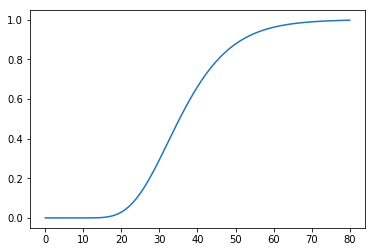

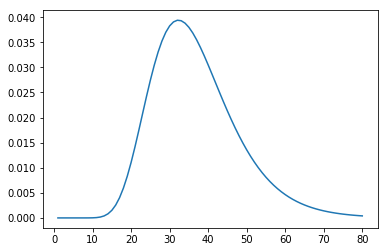

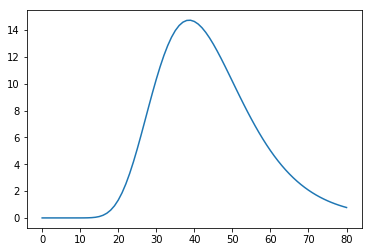

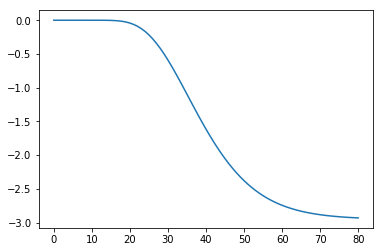

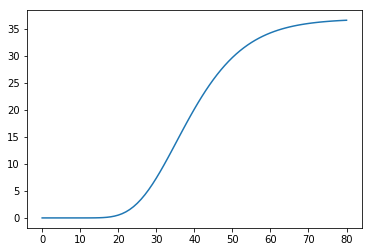

In [40]:
plt.plot(call_deltas)
plt.show()

plt.plot(call_gammas)
plt.show()

plt.plot(call_vegas)
plt.show()

plt.plot(call_thetas)
plt.show()

plt.plot(call_rhos)
plt.show()

In [41]:
put_deltas = np.empty(81)
put_gammas = np.empty(81)
put_vegas = np.empty(81)
put_thetas = np.empty(81)
put_rhos = np.empty(81)

In [42]:
for i in range(81):
    put_deltas[i] = bsmPutDelta(i, strike, vol, rate, tau, div)
    put_gammas[i] = bsmPutGamma(i, strike, vol, rate, tau, div)
    put_vegas[i] = bsmPutVega(i, strike, vol, rate, tau, div)
    put_thetas[i] = bsmPutTheta(i, strike, vol, rate, tau, div)
    put_rhos[i] = bsmPutRho(i, strike, vol, rate, tau, div)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


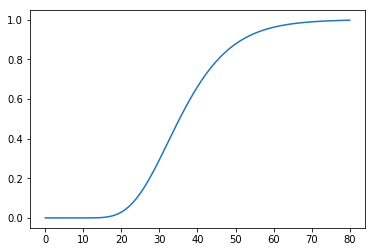

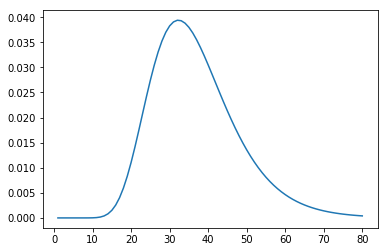

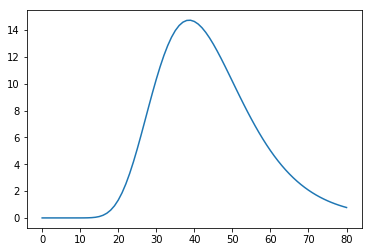

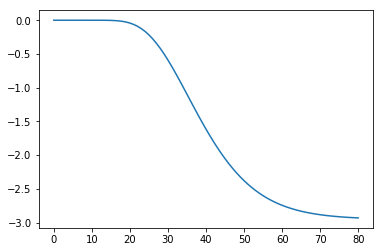

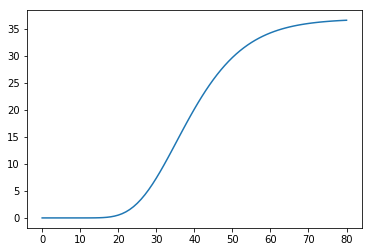

In [43]:
plt.plot(call_deltas)
plt.show()	

plt.plot(call_gammas)
plt.show()

plt.plot(call_vegas)
plt.show()

plt.plot(call_thetas)
plt.show()

plt.plot(call_rhos)
plt.show()

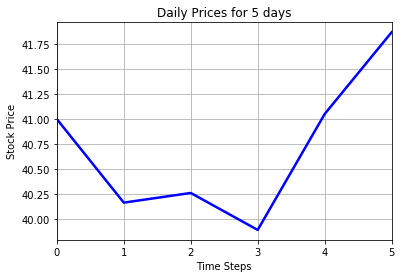

In [48]:
# Problem_2
def plotPricePath(path):
    nsteps = path.shape[0]
    plt.plot(path, 'b', linewidth = 2.5)
    plt.title("Daily Prices for 5 days")
    plt.xlabel("Time Steps")
    plt.ylabel("Stock Price")
    plt.xlim((0, nsteps - 1))
    plt.grid(True)
    plt.show()
    
S = 41.0
K = 40.0
v = 0.30
r = 0.08
q = 0.0
T = 1.0
n = 6
h = T / 252

path = np.zeros(n)
z = np.random.normal(size=n)
path[0] = S

for t in range(1, n):
    path[t] = path[t-1] * np.exp((r - q - 0.5 * v * v) * h + v * np.sqrt(h) * z[t])
    
plotPricePath(path)